<a href="https://colab.research.google.com/github/Mastaiah/Deep-Learning-Using-Pytorch/blob/main/Multi_Decision_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from typing import TypedDict, Optional
from langgraph.graph import StateGraph, END
from IPython.display import display, Image

In [ ]:
#Define state class
class GraphState(TypedDict):
  user_input: Optional[str] = None
  classification: Optional[str] = None
  support_type: Optional[str] = None
  response:Optional[str] = None

In [ ]:
#Define workflow
workflow = StateGraph(GraphState)

In [ ]:
# Classify based on user input
def input_clasification(state):
  user_input = state.get("user_input","").strip().lower()
  if any(word in user_input for word in ["hi", "hello","hey", "hola"]):
    return {"classification":"greeting"}
  elif any (word in user_input for word in ["support", "help", "issue", "problem"]):
    return {"classification":"support"}
  else:
    return {"classification":"general"}

In [ ]:
def handle_greeting(state):
  return {"response": "Hello! How can I assist you today?"}

def handle_general(state):
  return {"response": "I can help with various topics. Please specify your query."}

def support_classify(state):
  user_input = state.get("user_input").strip().lower()
  if re.search(r'\b("urgent | immediately | priority | critical")', user_input):
    return {"support_type": "urgent"}
  else:
    return {"support_type": "normal"}

In [ ]:
def decide_first_step(state):
  classification = state.get("classification")
  if classification == "greeting":
    return "greeting"
  elif classification == "support":
    return "support"
  else:
    return "general"

In [ ]:
# Create nodes
workflow.add_node("classify_input", input_clasification)
workflow.add_node("greeting_handler", handle_greeting)
workflow.add_node("general_handler", handle_general)
workflow.add_node("classify_support", support_classify)

In [ ]:
# Conditional Edge: Route Based on Classification
workflow.add_conditional_edges(
    source = "classify_input",
    path = decide_first_step,
    path_map = {
        "greeting": "greeting_handler",
        "support": "classify_support",
        "general": "general_handler"
    }
)

In [ ]:
def support_path(state):
  support_type = state.get("support_type")
  if support_type == "urgent":
    return "urgent"
  else:
    return "normal"

In [ ]:
def urgent_handler(state):
  return {"response":"This seems urgent!!! . Connecting you to a priority support agent"}

def normal_handler(state):
  return {"response":"Our support team will assist you shortly"}

In [ ]:
workflow.add_node("urgent_support", urgent_handler)
workflow.add_node("normal_support", normal_handler)

In [ ]:
# Conditional Edge : Route Based on Support Type
workflow.add_conditional_edges(
    source = "classify_support",
    path = support_path,
    path_map = {
        "urgent": "urgent_support",
        "normal": "normal_support",
    }
)

In [ ]:
#Define Entry Point and End Nodes
workflow.set_entry_point("classify_input")
workflow.add_edge("greeting_handler",END)
workflow.add_edge("general_handler",END)
workflow.add_edge("urgent_support",END)
workflow.add_edge("normal_support",END)

In [ ]:
#Compile Workflow
app = workflow.compile()


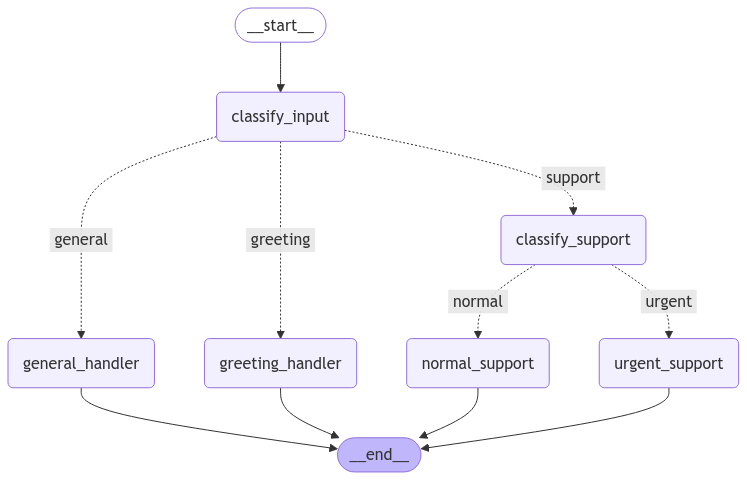

In [ ]:
png_graph = app.get_graph().draw_mermaid_png()
display(Image(png_graph))